<a href="https://colab.research.google.com/github/ManasaR08/Tensorflow/blob/main/Introduction_to_CNNs_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/Food101

/content/gdrive/My Drive/Food101


In [3]:
%cd data_experiment

/content/gdrive/My Drive/Food101/data_experiment


## Inspect the data

In [4]:
!ls

train  val


In [5]:
%cd train

/content/gdrive/My Drive/Food101/data_experiment/train


In [6]:
!ls

pizza  steak


In [7]:
import os

for dirpath, dirnames, filenames in os.walk("pizza"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 800 images in 'pizza'.


In [8]:
num_images_apple_pie = len(os.listdir("pizza"))
num_images_apple_pie

800

## Visualizing the data

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/gdrive/My Drive/Food101/data_experiment/train")
class_names  = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [10]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder+ "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


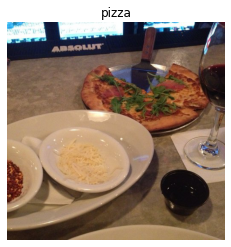

In [12]:
img = view_random_image("/content/gdrive/My Drive/Food101/data_experiment/train/", "pizza")

Image shape: (512, 512, 3)
Image shape: (406, 512, 3)


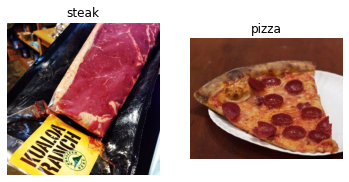

In [13]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/content/gdrive/My Drive/Food101/data_experiment/train/", "steak")
plt.subplot(1,2,2)
pizza_img = steak_img = view_random_image("/content/gdrive/My Drive/Food101/data_experiment/train/", "pizza")

## End-to End CNN Model

* Load
* Preprocess
* Build model
* Compile
* Fit

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/gdrive/My Drive/Food101/data_experiment/train/"
test_dir = "/content/gdrive/My Drive/Food101/data_experiment/val/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [15]:
#Tiny VGG
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation="relu",
                                                      input_shape=(224,224,3)),
                               tf.keras.layers.Conv2D(10,3, activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding="valid"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.Conv2D(10, 3, activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

In [16]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [17]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
50/50 [==============================] - 586s 11s/step - loss: 0.5140 - accuracy: 0.7431 - val_loss: 0.3993 - val_accuracy: 0.8075
Epoch 2/5
50/50 [==============================] - 11s 220ms/step - loss: 0.3965 - accuracy: 0.8263 - val_loss: 0.4304 - val_accuracy: 0.8325
Epoch 3/5
50/50 [==============================] - 11s 227ms/step - loss: 0.3806 - accuracy: 0.8375 - val_loss: 0.3767 - val_accuracy: 0.8350
Epoch 4/5
50/50 [==============================] - 12s 236ms/step - loss: 0.3305 - accuracy: 0.8625 - val_loss: 0.4180 - val_accuracy: 0.8200
Epoch 5/5
50/50 [==============================] - 11s 228ms/step - loss: 0.3397 - accuracy: 0.8587 - val_loss: 0.3819 - val_accuracy: 0.8400


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Evaluating model

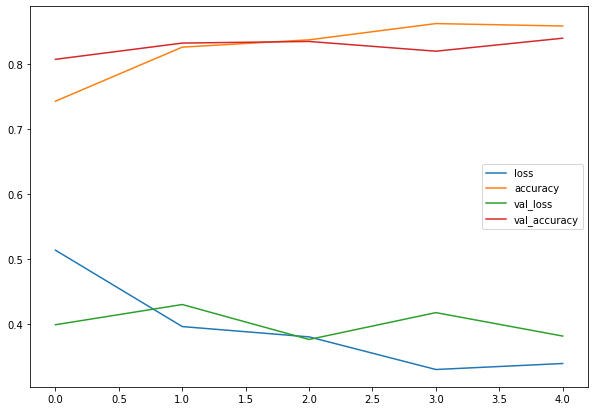

In [19]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [22]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuravy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


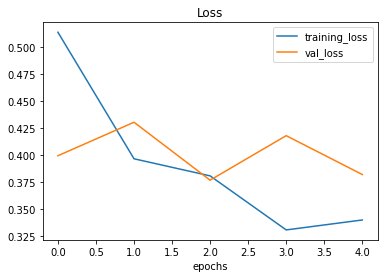

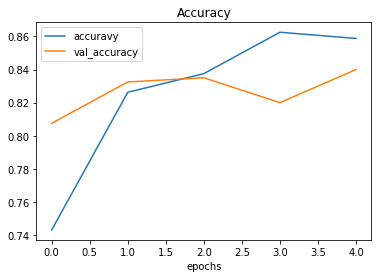

In [23]:
plot_loss_curves(history_1)

### When a model's validation loss starts to increase, the model might be overfitting. Ideally, training loss and validation loss are similar curves